In [1]:
!pip install opencv-python matplotlib scikit-learn

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.cluster import KMeans
from google.colab import files

In [3]:
uploaded = files.upload()

Saving terang.jpg to terang.jpg
Saving redup.jpg to redup.jpg
Saving normal.jpeg to normal.jpeg


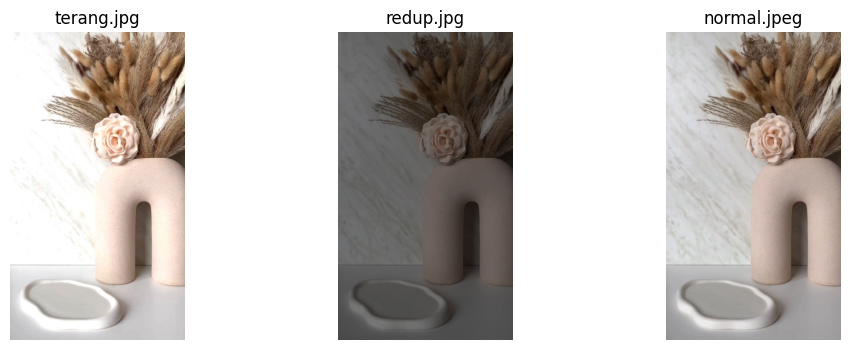

In [4]:
def load_image(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

images = {}

for name in uploaded.keys():
    images[name] = load_image(name)

plt.figure(figsize=(12,4))
for i,(name,img) in enumerate(images.items()):
    plt.subplot(1,len(images),i+1)
    plt.imshow(img)
    plt.title(name)
    plt.axis("off")
plt.show()

In [5]:
def convert_color(img):

    start = time.time()

    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)

    end = time.time()

    return gray, hsv, lab, end-start

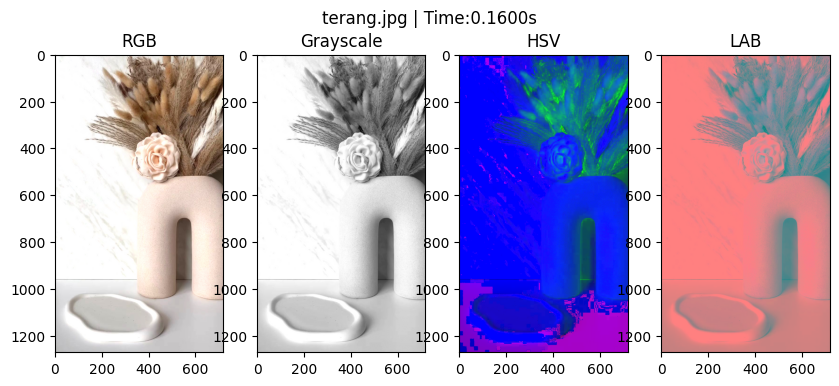

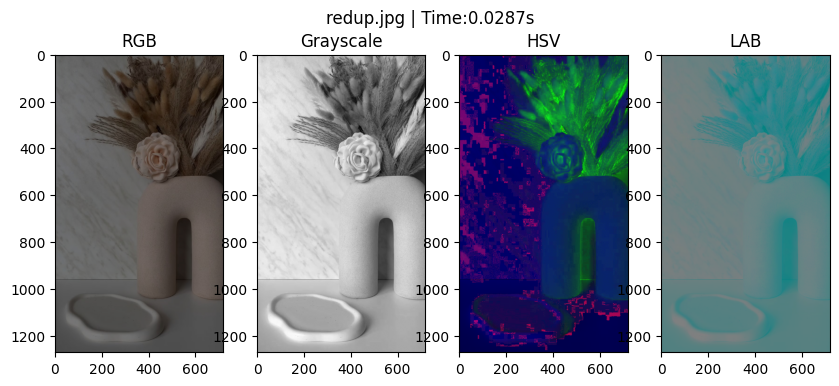

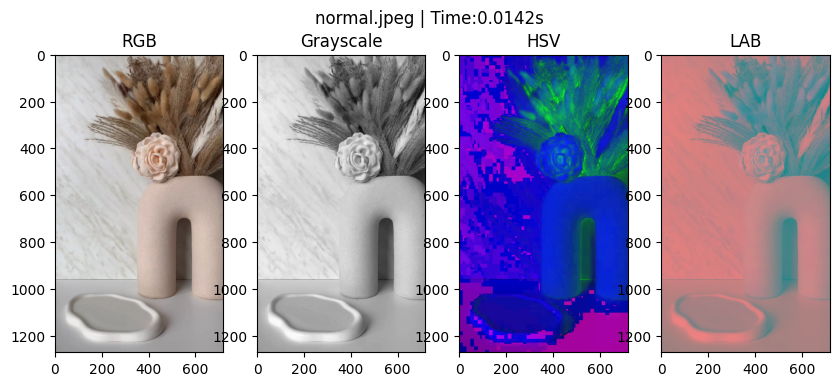

In [6]:
for name,img in images.items():

    gray, hsv, lab, t = convert_color(img)

    plt.figure(figsize=(10,4))

    plt.subplot(1,4,1)
    plt.imshow(img)
    plt.title("RGB")

    plt.subplot(1,4,2)
    plt.imshow(gray,cmap='gray')
    plt.title("Grayscale")

    plt.subplot(1,4,3)
    plt.imshow(hsv)
    plt.title("HSV")

    plt.subplot(1,4,4)
    plt.imshow(lab)
    plt.title("LAB")

    plt.suptitle(f"{name} | Time:{t:.4f}s")
    plt.show()

In [7]:
def uniform_quantization(img, level=16):
    step = 256 // level
    quantized = (img // step) * step
    return quantized

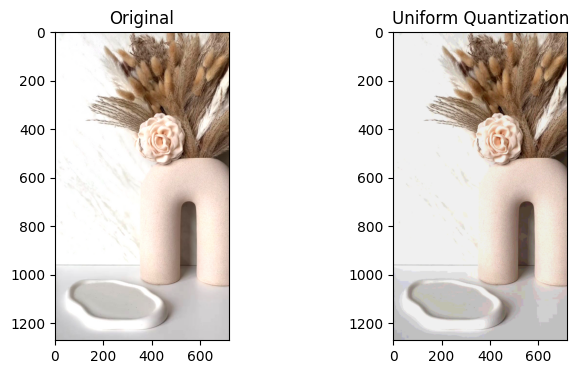

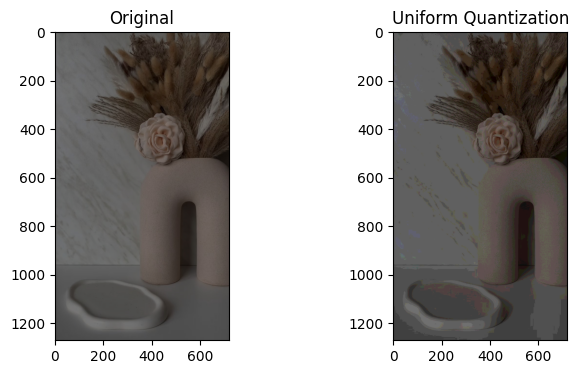

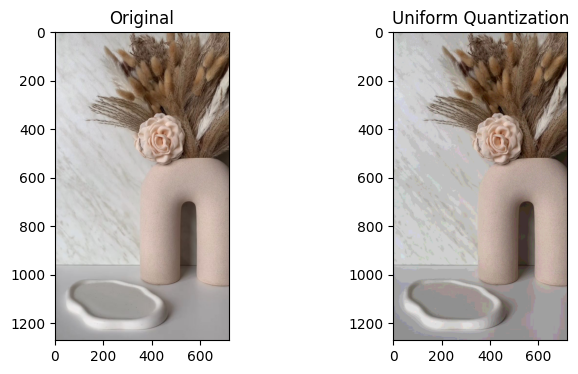

In [8]:
for name,img in images.items():

    uq = uniform_quantization(img)

    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.title("Original")

    plt.subplot(1,2,2)
    plt.imshow(uq)
    plt.title("Uniform Quantization")

    plt.show()

In [9]:
def kmeans_quantization(img, k=16):

    data = img.reshape((-1,3))

    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)

    centers = kmeans.cluster_centers_.astype(np.uint8)
    quantized = centers[labels]

    return quantized.reshape(img.shape)

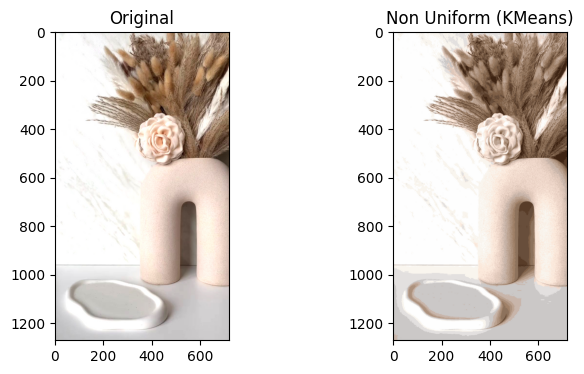

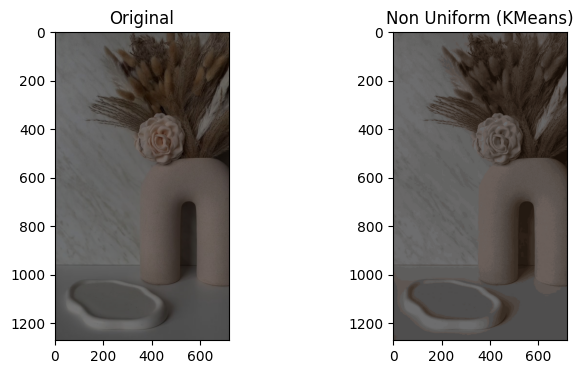

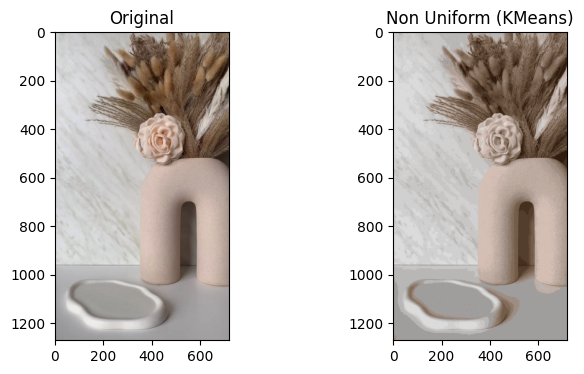

In [10]:
for name,img in images.items():

    kq = kmeans_quantization(img)

    plt.figure(figsize=(8,4))

    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.title("Original")

    plt.subplot(1,2,2)
    plt.imshow(kq)
    plt.title("Non Uniform (KMeans)")

    plt.show()

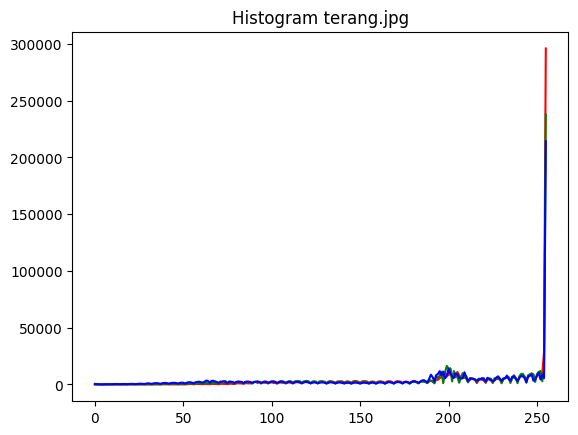

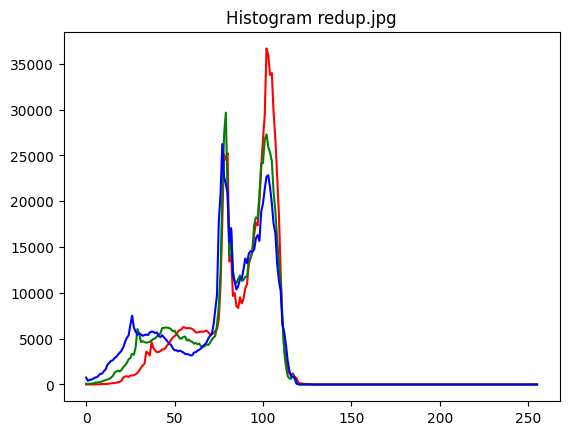

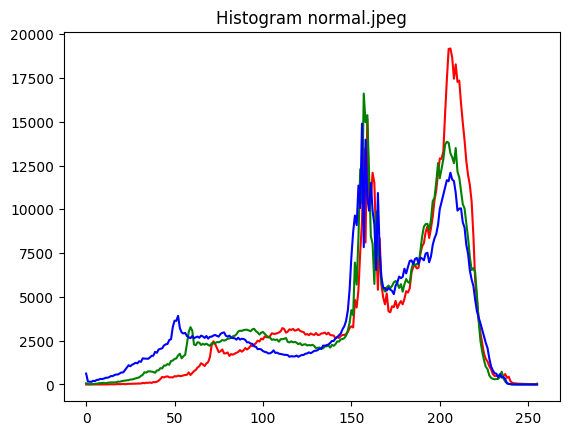

In [11]:
def show_histogram(img,title):

    plt.figure()
    colors=('r','g','b')

    for i,c in enumerate(colors):
        hist=cv2.calcHist([img],[i],None,[256],[0,256])
        plt.plot(hist,color=c)

    plt.title(title)
    plt.show()

for name,img in images.items():
    show_histogram(img,f"Histogram {name}")

In [12]:
def image_memory(img):
    return img.nbytes/1024  # KB

for name,img in images.items():

    uq = uniform_quantization(img)
    kq = kmeans_quantization(img)

    print(f"\n{name}")
    print("Original :",image_memory(img),"KB")
    print("Uniform  :",image_memory(uq),"KB")
    print("KMeans   :",image_memory(kq),"KB")


terang.jpg
Original : 2683.125 KB
Uniform  : 2683.125 KB
KMeans   : 2683.125 KB

redup.jpg
Original : 2683.125 KB
Uniform  : 2683.125 KB
KMeans   : 2683.125 KB

normal.jpeg
Original : 2683.125 KB
Uniform  : 2683.125 KB
KMeans   : 2683.125 KB


In [13]:
def compression_ratio(original,compressed):
    return original/compressed

for name,img in images.items():

    uq = uniform_quantization(img)

    r = compression_ratio(
        image_memory(img),
        image_memory(uq)
    )

    print(name,"Compression Ratio:",r)

terang.jpg Compression Ratio: 1.0
redup.jpg Compression Ratio: 1.0
normal.jpeg Compression Ratio: 1.0


In [14]:
for name,img in images.items():

    start=time.time()
    uniform_quantization(img)
    t1=time.time()-start

    start=time.time()
    kmeans_quantization(img)
    t2=time.time()-start

    print(f"\n{name}")
    print("Uniform Time:",t1)
    print("KMeans Time:",t2)


terang.jpg
Uniform Time: 0.0018148422241210938
KMeans Time: 4.952528715133667

redup.jpg
Uniform Time: 0.0012993812561035156
KMeans Time: 1.6434290409088135

normal.jpeg
Uniform Time: 0.0012273788452148438
KMeans Time: 2.1543571949005127
